# Lab 0
## Introduction
This lab is useful for students with little to no experience working with visualization in python, but assumes an elementary familiarity with programming concepts in the language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image = Image.open('data/lemon.png')

# Convert the image to a numpy array
image = np.array(image)

## Image formats
Images are typically stored as 8-bit unsigned integers, `uint8`, with each pixel taking values from 0 to 2<sup>8</sup>-1 (0-255), or 16-bit unsigned integers, `uint16`, with values in the range 0 to 2<sup>16</sup> (0-65535). However, it is more convenient to work in floating point values ranging between 0 to 1.

Different imaging processing libraries assume different input formats for pixels, be observant what the functions you use actually require.

First inspect what is the minimum and maximum values of your image data:

In [2]:
# Get the range of values of the image
min_value = np.min(image)
max_value = np.max(image)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0
Maximum value: 255


In [3]:
# Convert image to 0-1 range
image = image / 255

# Get the range of values of the image
min_value = np.min(image)
max_value = np.max(image)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 1.0


Although it is possible to simply view an image using

```python
plt.imshow(image)
```
it is recommended to create an axis and figure object, which yields higher flexibility.

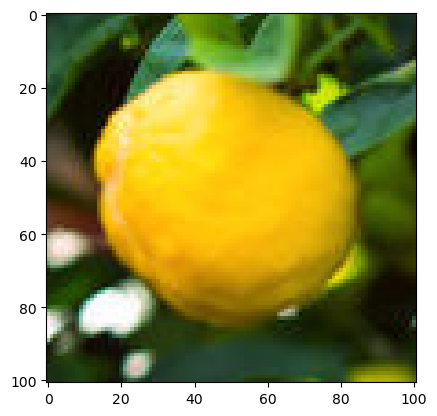

In [4]:
f, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Display the plot
# No further modification of the plot is possible after calling plt.show()
plt.show() # Not required in Jupyter notebooks, but required in scripts

An image is commonly a rectangular arrangement of pixels, with a height *H* and width *W* and number of channels *C*. 

Each pixel is associated with a colur. There are many different colour spaces. The most common representation is the RGB (*red-green-blue*) colour space (thus having *C=3*), where each channel contains the amount of pigment of these three base colours. Another common representation is the HSV/HSL (*hue-saturation-lightness*) space. Although the latter is very common in computer vision and image analysis tasks, we will assume that images are saved in RGB format throughout the course. 

Commonly, the spaces are slightly modified with an *alpha* channel, e.g. RGBA, containing information about transparency in the image. These have *C=4* channels.

A grayspace image typically only has *C=1* channel.

We can inspect the shape of an image using `image.shape`:

In [5]:
image.shape

(101, 101, 4)

This image is thus in RGBA format.

### Exercise 0.1: Channels
Matplotlib's `imshow` requires that images are of the following format: (*H*, *W*, *C*), where the number of channels is last, and may be between 1 and 4.

Try visualizing each individual color channel using `imshow`. You can select the *i*th color channel using `image[:,:,i]`.

To plot each channel in separate plots, you must call `plt.show()` after each `imshow`.

### Exercise 0.2: Grayscale
Converting an image into grayscale (a single channel) can be done in many ways. Try to compute the mean over the channel dimension using `np.mean(image, axis=2)` and display the result.

Observe that the white area in the image is light in all channels, since white is a combination of all colours.

### Exercise 0.3: Subplots
It is often more convenient to plot multiple images in the same plot. We can use the `plt.subplots` function to create multiple axes for example using

```python
f, ax = plt.subplots(nrows, ncols)

ax[0, 0].imshow(...) # first row, first column
ax[0, 1].imshow(...) # first row, second column
ax[1, 0].imshow(...) # second row, first column
...
```
Use this to plot each channel on one row next to eachother.


### Exercise 0.4: Text and coordinates
Try plotting an asterisk in the bottom left corner of the image. When you create an axis and figure, you can fill it and modify it until you call `plt.show` or `plt.close`. Use e.g. `ax.text(col, row, s="*")` to add an asterisk to the desired row and column in the image. Observe the order that the coordinates are given in. Use the argument `c=...` to modify the colour of the text for better visibility.

### Exercise 0.5: Functions
The next thing to try is to create a function. Unlike a script, a function takes a number of arguments, but apart from these it cannot use the variables that you have defined in your notebook. To create a function `read_image` that takes the file path to an image and returns a plot figure see below:

In [6]:
def read_image(image_path):

    # Load the image
    image = Image.open(image_path)

    # Convert the image to a numpy array
    image = np.array(image)

    # Convert image to 0-1 range
    image = image / 255

    return image

Try the function:

Here, `read_image` is called the function *handle* (or *name*), and `image_path` is the argument to the function. The function returns an `array` called `image` to the outside scope.

Next, define a function `read_image_grayscale` in a new file called `functions.py`. It should take the same argument as the previous function, but return a grayscale image array.

You can then import the function using the `import` keyword.

In [7]:
from functions import read_image_grayscale

image = read_image_grayscale('./lemon.png')

f, ax = plt.subplots()

# Display the image
ax.imshow(image, cmap='gray')

plt.show()

ModuleNotFoundError: No module named 'functions'